In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
data = pd.read_csv("BTC-USD_SIGNALS.csv")
data

,Date,Open,High,Low,Close,Volume,Variation,RSI,MACD,MACD_H,-DM,+DM,ADX14,Confirmation Time,Transactions,Miners Revenue,FnG
0,2018-02-01,10237.299805,10288.799805,8812.280273,9170.540039,-0.292146,-2.712213,-1.043523,-1.108359,-0.475907,1.319161,-0.323408,0.521410,1.144750,-0.774692,-0.186892,-0.583209
1,2018-02-02,9142.280273,9142.280273,7796.490234,8830.750000,-0.152676,-1.011481,-1.204172,-1.202571,-0.654534,1.402518,-0.323408,0.393472,1.144750,-0.774692,-0.186892,-1.244407
2,2018-02-03,8852.120117,9430.750000,8251.629883,9174.910156,-0.427993,0.955604,-1.632900,-1.235294,-0.618233,-0.269198,0.287977,0.409785,1.114249,-0.774692,-0.186892,-0.142410
3,2018-02-04,9175.700195,9334.870117,8031.220215,8277.009766,-0.437581,-2.584947,-1.626830,-1.320379,-0.741794,0.093536,-0.323408,0.427573,1.114249,-1.144752,-0.264496,-0.847688
4,2018-02-05,8270.540039,8364.839844,6756.680176,6955.270020,-0.326118,-4.184569,-1.814295,-1.479953,-1.057732,1.828350,-0.323408,0.462483,1.114249,-1.144752,-0.264496,-1.420727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,2022-09-04,19832.470703,19999.689453,19636.816406,19986.712891,0.478227,0.148948,-1.113287,-0.844382,-0.254845,-0.167922,-0.323408,0.699748,-1.063067,-0.648298,-0.307825,-1.024008
1680,2022-09-05,19988.789063,20031.160156,19673.046875,19812.371094,0.658018,-0.278482,-1.133325,-0.831832,-0.166540,-0.269198,-0.256709,0.691814,-0.742360,-0.648298,-0.307825,-0.891768
1681,2022-09-06,19817.724609,20155.269531,18800.171875,18837.667969,1.393318,-1.325705,-1.548973,-0.892284,-0.308652,1.167318,-0.323408,0.776149,-0.742360,-0.165203,-0.359746,-0.935848
1682,2022-09-07,18837.683594,19427.171875,18644.466797,19290.324219,0.981876,0.568952,-1.180050,-0.893278,-0.249058,-0.012950,-0.323408,0.881401,-0.742360,-0.165203,-0.359746,-0.847688


# Correlations

In [3]:
corr = data.corr("spearman")
corr

,Open,High,Low,Close,Volume,Variation,RSI,MACD,MACD_H,-DM,+DM,ADX14,Confirmation Time,Transactions,Miners Revenue,FnG
Open,1.000000,0.998789,0.998368,0.997318,0.695698,-0.028736,0.088752,0.154858,-0.004918,0.142089,0.146516,-0.108522,-0.082210,-0.088747,0.887638,0.273665
High,0.998789,1.000000,0.997863,0.998676,0.702281,0.001898,0.096506,0.155834,-0.000358,0.125810,0.171340,-0.104764,-0.078512,-0.089046,0.889125,0.274098
Low,0.998368,0.997863,1.000000,0.998754,0.691858,0.003975,0.100563,0.158835,0.004588,0.111547,0.164926,-0.113920,-0.088293,-0.083622,0.883554,0.276658
Close,0.997318,0.998676,0.998754,1.000000,0.697723,0.031704,0.105808,0.159204,0.006816,0.106101,0.180015,-0.108744,-0.082135,-0.085757,0.885856,0.275767
Volume,0.695698,0.702281,0.691858,0.697723,1.000000,0.038129,0.190448,0.243312,0.006024,0.095845,0.178726,-0.081463,0.140704,0.258613,0.579938,0.300334
Variation,-0.028736,0.001898,0.003975,0.031704,0.038129,1.000000,0.249757,0.081463,0.142537,-0.570820,0.555649,0.018352,0.046942,0.052755,-0.030147,0.046482
RSI,0.088752,0.096506,0.100563,0.105808,0.190448,0.249757,1.000000,0.673356,0.656900,-0.258543,0.251322,0.067245,0.157509,0.262073,0.054013,0.604237
MACD,0.154858,0.155834,0.158835,0.159204,0.243312,0.081463,0.673356,1.000000,0.209437,-0.101210,0.105208,-0.010269,0.202946,0.378117,0.127921,0.811152
MACD_H,-0.004918,-0.000358,0.004588,0.006816,0.006024,0.142537,0.656900,0.209437,1.000000,-0.197181,0.191870,0.113791,0.041363,0.013287,-0.001313,0.183401
-DM,0.142089,0.125810,0.111547,0.106101,0.095845,-0.570820,-0.258543,-0.101210,-0.197181,1.000000,-0.637194,-0.016526,-0.069246,-0.107972,0.166414,-0.111700


In [4]:
corr[["Variation"]].sort_values(by="Variation")

,Variation
-DM,-0.570820
Miners Revenue,-0.030147
Open,-0.028736
High,0.001898
Low,0.003975
ADX14,0.018352
Close,0.031704
Volume,0.038129
FnG,0.046482
Confirmation Time,0.046942


array([[<AxesSubplot:xlabel='Open', ylabel='Open'>,
        <AxesSubplot:xlabel='High', ylabel='Open'>,
        <AxesSubplot:xlabel='Low', ylabel='Open'>,
        <AxesSubplot:xlabel='Close', ylabel='Open'>,
        <AxesSubplot:xlabel='Volume', ylabel='Open'>,
        <AxesSubplot:xlabel='Variation', ylabel='Open'>,
        <AxesSubplot:xlabel='RSI', ylabel='Open'>,
        <AxesSubplot:xlabel='MACD', ylabel='Open'>,
        <AxesSubplot:xlabel='MACD_H', ylabel='Open'>,
        <AxesSubplot:xlabel='-DM', ylabel='Open'>,
        <AxesSubplot:xlabel='+DM', ylabel='Open'>,
        <AxesSubplot:xlabel='ADX14', ylabel='Open'>,
        <AxesSubplot:xlabel='Confirmation Time', ylabel='Open'>,
        <AxesSubplot:xlabel='Transactions', ylabel='Open'>,
        <AxesSubplot:xlabel='Miners Revenue', ylabel='Open'>,
        <AxesSubplot:xlabel='FnG', ylabel='Open'>],
       [<AxesSubplot:xlabel='Open', ylabel='High'>,
        <AxesSubplot:xlabel='High', ylabel='High'>,
        <AxesSubplot:xlabe

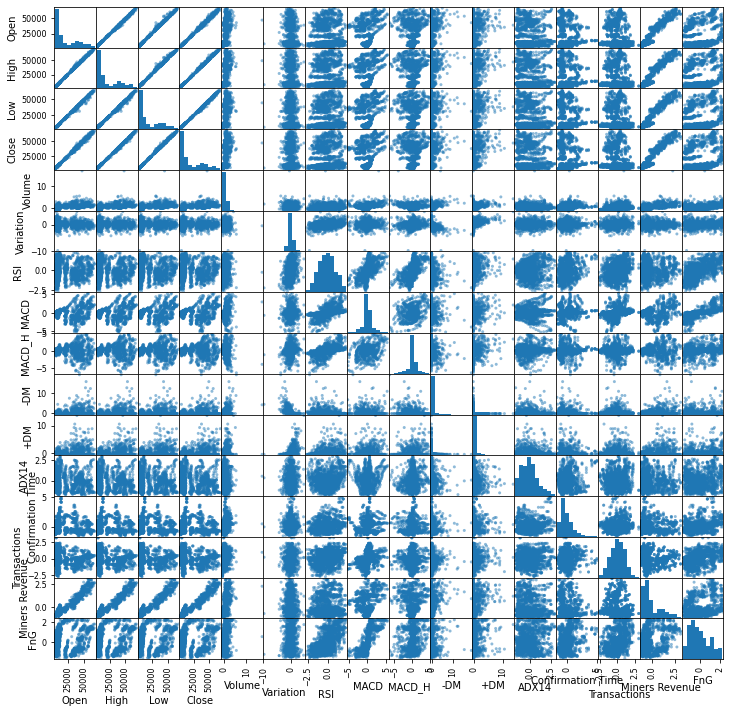

In [5]:
pd.plotting.scatter_matrix(data,figsize=[12,12])

## Adding Variation+1

In [6]:
newdata = data.copy()
newdata["Variation+1"] = data["Variation"].shift(-1)
newdata

,Date,Open,High,Low,Close,Volume,Variation,RSI,MACD,MACD_H,-DM,+DM,ADX14,Confirmation Time,Transactions,Miners Revenue,FnG,Variation+1
0,2018-02-01,10237.299805,10288.799805,8812.280273,9170.540039,-0.292146,-2.712213,-1.043523,-1.108359,-0.475907,1.319161,-0.323408,0.521410,1.144750,-0.774692,-0.186892,-0.583209,-1.011481
1,2018-02-02,9142.280273,9142.280273,7796.490234,8830.750000,-0.152676,-1.011481,-1.204172,-1.202571,-0.654534,1.402518,-0.323408,0.393472,1.144750,-0.774692,-0.186892,-1.244407,0.955604
2,2018-02-03,8852.120117,9430.750000,8251.629883,9174.910156,-0.427993,0.955604,-1.632900,-1.235294,-0.618233,-0.269198,0.287977,0.409785,1.114249,-0.774692,-0.186892,-0.142410,-2.584947
3,2018-02-04,9175.700195,9334.870117,8031.220215,8277.009766,-0.437581,-2.584947,-1.626830,-1.320379,-0.741794,0.093536,-0.323408,0.427573,1.114249,-1.144752,-0.264496,-0.847688,-4.184569
4,2018-02-05,8270.540039,8364.839844,6756.680176,6955.270020,-0.326118,-4.184569,-1.814295,-1.479953,-1.057732,1.828350,-0.323408,0.462483,1.114249,-1.144752,-0.264496,-1.420727,2.918547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,2022-09-04,19832.470703,19999.689453,19636.816406,19986.712891,0.478227,0.148948,-1.113287,-0.844382,-0.254845,-0.167922,-0.323408,0.699748,-1.063067,-0.648298,-0.307825,-1.024008,-0.278482
1680,2022-09-05,19988.789063,20031.160156,19673.046875,19812.371094,0.658018,-0.278482,-1.133325,-0.831832,-0.166540,-0.269198,-0.256709,0.691814,-0.742360,-0.648298,-0.307825,-0.891768,-1.325705
1681,2022-09-06,19817.724609,20155.269531,18800.171875,18837.667969,1.393318,-1.325705,-1.548973,-0.892284,-0.308652,1.167318,-0.323408,0.776149,-0.742360,-0.165203,-0.359746,-0.935848,0.568952
1682,2022-09-07,18837.683594,19427.171875,18644.466797,19290.324219,0.981876,0.568952,-1.180050,-0.893278,-0.249058,-0.012950,-0.323408,0.881401,-0.742360,-0.165203,-0.359746,-0.847688,0.000209


In [7]:
corr = newdata.corr("spearman")
corr

,Open,High,Low,Close,Volume,Variation,RSI,MACD,MACD_H,-DM,+DM,ADX14,Confirmation Time,Transactions,Miners Revenue,FnG,Variation+1
Open,1.000000,0.998789,0.998368,0.997318,0.695698,-0.028736,0.088752,0.154858,-0.004918,0.142089,0.146516,-0.108522,-0.082210,-0.088747,0.887638,0.273665,-0.023793
High,0.998789,1.000000,0.997863,0.998676,0.702281,0.001898,0.096506,0.155834,-0.000358,0.125810,0.171340,-0.104764,-0.078512,-0.089046,0.889125,0.274098,-0.024598
Low,0.998368,0.997863,1.000000,0.998754,0.691858,0.003975,0.100563,0.158835,0.004588,0.111547,0.164926,-0.113920,-0.088293,-0.083622,0.883554,0.276658,-0.026967
Close,0.997318,0.998676,0.998754,1.000000,0.697723,0.031704,0.105808,0.159204,0.006816,0.106101,0.180015,-0.108744,-0.082135,-0.085757,0.885856,0.275767,-0.028394
Volume,0.695698,0.702281,0.691858,0.697723,1.000000,0.038129,0.190448,0.243312,0.006024,0.095845,0.178726,-0.081463,0.140704,0.258613,0.579938,0.300334,0.022955
Variation,-0.028736,0.001898,0.003975,0.031704,0.038129,1.000000,0.249757,0.081463,0.142537,-0.570820,0.555649,0.018352,0.046942,0.052755,-0.030147,0.046482,-0.045078
RSI,0.088752,0.096506,0.100563,0.105808,0.190448,0.249757,1.000000,0.673356,0.656900,-0.258543,0.251322,0.067245,0.157509,0.262073,0.054013,0.604237,0.037720
MACD,0.154858,0.155834,0.158835,0.159204,0.243312,0.081463,0.673356,1.000000,0.209437,-0.101210,0.105208,-0.010269,0.202946,0.378117,0.127921,0.811152,0.035004
MACD_H,-0.004918,-0.000358,0.004588,0.006816,0.006024,0.142537,0.656900,0.209437,1.000000,-0.197181,0.191870,0.113791,0.041363,0.013287,-0.001313,0.183401,0.007900
-DM,0.142089,0.125810,0.111547,0.106101,0.095845,-0.570820,-0.258543,-0.101210,-0.197181,1.000000,-0.637194,-0.016526,-0.069246,-0.107972,0.166414,-0.111700,0.020737


In [8]:
corr[["Variation+1"]].sort_values(by="Variation+1")

,Variation+1
Variation,-0.045078
Miners Revenue,-0.035875
Close,-0.028394
Low,-0.026967
High,-0.024598
Open,-0.023793
+DM,-0.005756
MACD_H,0.007900
ADX14,0.012656
-DM,0.020737


In [9]:
#plt.show()

## Variation with respect to other variables

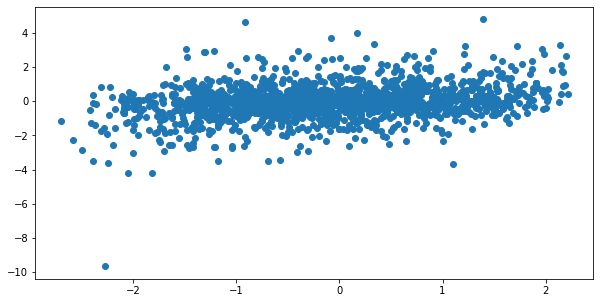

In [10]:
plt.figure(figsize=[10,5])
plt.scatter(data["RSI"],data["Variation"])

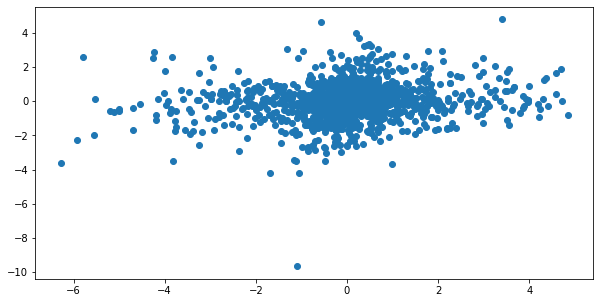

In [11]:
plt.figure(figsize=[10,5])
plt.scatter(data["MACD_H"],data["Variation"])

No handles with labels found to put in legend.


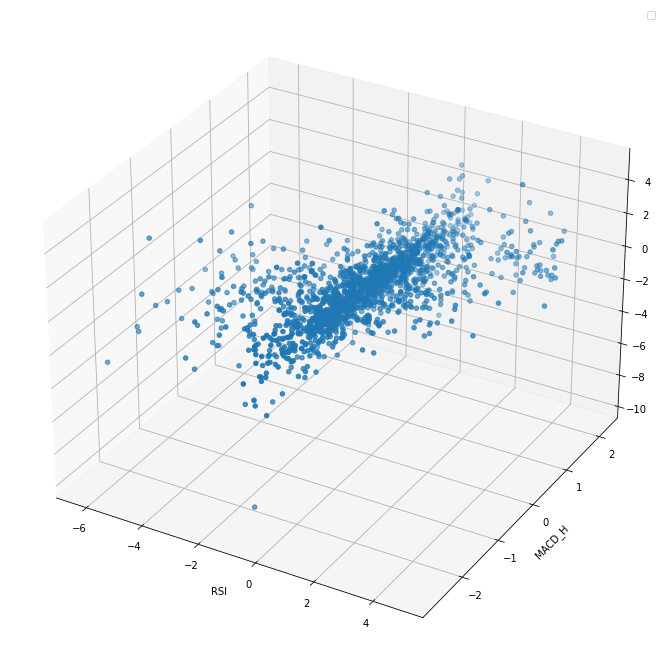

In [12]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(list(data["MACD_H"]),list(data["RSI"]),list(data["Variation"]))
plt.xlabel(xlabel="RSI")
plt.ylabel(ylabel="MACD_H")
plt.legend()
plt.show()

# Examining Predict Data

## Initial Data

In [13]:
predict_data = data.copy().drop(["Open","Close","High","Low"],axis=1)
max_days = 5
target_range = 2
for i in range(1,max_days):#2jours
    #predict_data[["Variation-{}".format(i),"Vol-{}".format(i),"RSI-{}".format(i),"MACD-{}".format(i),"MACD_H-{}".format(i),"CONF-{}".format(i),"TRANS-{}".format(i),"REV-{}".format(i),"FnG-{}".format(i)]] = data[["Variation","Volume","RSI","MACD","MACD_H","Confirmation Time","Transactions","Miners Revenue","FnG"]].shift(i)
    predict_data[["Variation-{}".format(i),"Vol-{}".format(i),"RSI-{}".format(i),"MACD-{}".format(i),"MACD_H-{}".format(i),"CONF-{}".format(i),"TRANS-{}".format(i),"REV-{}".format(i),"FnG-{}".format(i), "ADX-{}".format(i), "+DM-{}".format(i), "-DM-{}".format(i)]] = data[["Variation","Volume","RSI","MACD","MACD_H","Confirmation Time","Transactions","Miners Revenue","FnG","ADX14","+DM","-DM"]].shift(i)
    #predict_data[["Variation-{}".format(i),"Vol-{}".format(i),"RSI-{}".format(i),"MACD-{}".format(i),"MACD_H-{}".format(i)]] = data[["Variation","Volume","RSI","MACD","MACD_H"]].shift(i)
#predict_data["Target"] = (data["Variation"].shift(-1) >= 0)
predict_data["Target"] = (data["Close"].shift(-target_range) - data["Close"] >= 0)
predict_data["Target"] = np.where(predict_data["Target"] == True, 1, 0)
predict_data.dropna(inplace=True)
predict_data.reset_index(inplace=True,drop=True)
predict_data = predict_data[0:len(predict_data)-target_range]

In [14]:
corr = predict_data.corr()

In [15]:
corr

,Volume,Variation,RSI,MACD,MACD_H,-DM,+DM,ADX14,Confirmation Time,Transactions,...,MACD-4,MACD_H-4,CONF-4,TRANS-4,REV-4,FnG-4,ADX-4,+DM-4,-DM-4,Target
Volume,1.000000,0.009431,0.158619,0.239835,-0.085981,0.388817,0.314519,-0.027063,0.226088,0.238597,...,0.278719,0.006009,0.210192,0.228183,0.553869,0.376123,-0.049075,0.268678,0.288153,0.006106
Variation,0.009431,1.000000,0.279611,0.068868,0.151160,-0.451708,0.482092,0.029749,0.055949,0.046299,...,0.014896,-0.004395,0.068942,0.040657,-0.036432,0.035870,0.009717,0.011163,-0.046871,-0.011870
RSI,0.158619,0.279611,1.000000,0.545889,0.546000,-0.162832,0.207091,0.115035,0.210277,0.264752,...,0.383210,0.483361,0.218635,0.243381,0.004127,0.477035,0.089766,0.201713,-0.160290,0.038645
MACD,0.239835,0.068868,0.545889,1.000000,0.299814,-0.036922,0.170878,0.030723,0.145601,0.279857,...,0.935193,0.441326,0.152512,0.268749,0.219046,0.697168,0.060943,0.267942,-0.151371,0.020941
MACD_H,-0.085981,0.151160,0.546000,0.299814,1.000000,-0.217498,0.185923,0.127955,0.002714,0.014742,...,-0.036703,0.680700,0.031698,-0.021322,-0.139342,0.016772,0.114412,0.269478,-0.321247,-0.012357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FnG-4,0.376123,0.035870,0.477035,0.697168,0.016772,0.071488,0.151285,0.064463,0.354569,0.398457,...,0.720539,0.193393,0.348372,0.409177,0.289153,1.000000,0.083642,0.182985,0.016144,0.034992
ADX-4,-0.049075,0.009717,0.089766,0.060943,0.114412,-0.032040,-0.005928,0.833467,0.114054,-0.015876,...,0.030795,0.127791,0.152493,-0.009032,-0.079461,0.083642,1.000000,0.015557,-0.028074,-0.031595
+DM-4,0.268678,0.011163,0.201713,0.267942,0.269478,0.120253,0.187165,0.029194,0.040981,-0.015980,...,0.170802,0.186006,0.037213,0.001446,0.332771,0.182985,0.015557,1.000000,-0.137615,-0.016159
-DM-4,0.288153,-0.046871,-0.160290,-0.151371,-0.321247,0.226683,0.076501,-0.021299,0.002363,-0.077022,...,-0.037652,-0.217744,-0.018290,-0.071747,0.305915,0.016144,-0.028074,-0.137615,1.000000,-0.020821


In [16]:
corr["Target"].sort_values()

REV-2               -0.062715
REV-3               -0.061792
REV-1               -0.060918
REV-4               -0.059804
Miners Revenue      -0.056632
                       ...   
TRANS-2              0.082786
CONF-2               0.084255
Confirmation Time    0.086476
CONF-1               0.089037
Target               1.000000
Name: Target, Length: 61, dtype: float64

## Grouping Data by Mean

In [17]:
new_predict_data = predict_data.copy()

In [18]:
""""""
RSIs = ["RSI-{}".format(i) for i in range(1,max_days)]
RSIs.append("RSI")
MACDs = ["MACD-{}".format(i) for i in range(1,max_days)]
MACDs.append("MACD")
MACD_Hs = ["MACD_H-{}".format(i) for i in range(1,max_days)]
MACD_Hs.append("MACD_H")
Variations = ["Variation-{}".format(i) for i in range(1,max_days)]
Variations.append("Variation")
Revenues = ["REV-{}".format(i) for i in range(1,max_days)]
Revenues.append("Miners Revenue")
pDMs = ["+DM-{}".format(i) for i in range(1,max_days)]
pDMs.append("+DM")
mDMs = ["-DM-{}".format(i) for i in range(1,max_days)]
mDMs.append("-DM")
ADXs = ["ADX-{}".format(i) for i in range(1,max_days)]
ADXs.append("ADX14")
new_predict_data["RSI_MEAN"] = new_predict_data[RSIs].mean(axis=1)
new_predict_data["MACD_MEAN"] = new_predict_data[MACDs].mean(axis=1)
new_predict_data["MACD_H_MEAN"] = new_predict_data[MACD_Hs].mean(axis=1)
new_predict_data["Variation_MEAN"] = new_predict_data[Variations].mean(axis=1)
new_predict_data["Revenues_MEAN"] = new_predict_data[Revenues].mean(axis=1)
new_predict_data["+DM_MEAN"] = new_predict_data[pDMs].mean(axis=1)
new_predict_data["-DM_MEAN"] = new_predict_data[mDMs].mean(axis=1)
new_predict_data["ADX_MEAN"] = new_predict_data[ADXs].mean(axis=1)
new_predict_data.drop(RSIs+MACDs+MACD_Hs+Variations+Revenues+pDMs+mDMs+ADXs,axis=1,inplace=True)

In [19]:
new_predict_data

,Date,Volume,Confirmation Time,Transactions,FnG,Vol-1,CONF-1,TRANS-1,FnG-1,Vol-2,...,FnG-4,Target,RSI_MEAN,MACD_MEAN,MACD_H_MEAN,Variation_MEAN,Revenues_MEAN,+DM_MEAN,-DM_MEAN,ADX_MEAN
0,2018-02-05,-0.326118,1.114249,-1.144752,-1.420727,-0.437581,1.114249,-1.144752,-0.847688,-0.427993,...,-0.583209,1,-1.464344,-1.269311,-0.709640,-1.907521,-0.217933,-0.201131,0.874873,0.442945
1,2018-02-06,-0.088527,0.453384,-1.144752,-1.552966,-0.326118,1.114249,-1.144752,-1.420727,-0.437581,...,-1.244407,1,-1.498138,-1.352398,-0.809096,-0.781369,-0.233454,-0.201131,0.790375,0.439774
2,2018-02-07,-0.331965,0.453384,-1.959889,-0.318730,-0.088527,0.453384,-1.144752,-1.552966,-0.326118,...,-0.142410,1,-1.548785,-1.422310,-0.850266,-0.678191,-0.315423,0.077957,0.456032,0.466214
3,2018-02-08,-0.323021,0.453384,-1.959889,-0.583209,-0.331965,0.453384,-1.959889,-0.318730,-0.088527,...,-0.847688,1,-1.434930,-1.476227,-0.836585,-0.442400,-0.397391,-0.023270,0.456032,0.503496
4,2018-02-09,-0.452131,0.207605,-1.959889,0.033910,-0.323021,0.453384,-1.959889,-0.583209,-0.331965,...,-1.420727,0,-1.275593,-1.494747,-0.722483,0.359155,-0.463839,0.052270,0.383485,0.543338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,2022-09-02,0.673668,-1.063067,-0.310919,-0.803608,0.726988,-1.313931,-0.310919,-1.024008,0.880353,...,-0.847688,1,-1.340356,-0.862516,-0.822186,0.044765,-0.236214,-0.066210,-0.221270,0.398301
1674,2022-09-03,0.395940,-1.063067,-0.648298,-0.979928,0.673668,-1.063067,-0.310919,-0.803608,0.726988,...,-0.715449,0,-1.213730,-0.871510,-0.683202,-0.170605,-0.262783,-0.158790,-0.182954,0.500567
1675,2022-09-04,0.478227,-1.063067,-0.648298,-1.024008,0.395940,-1.063067,-0.648298,-0.979928,0.673668,...,-0.891768,0,-1.105659,-0.866115,-0.530078,-0.002485,-0.289351,-0.237285,-0.162699,0.592802
1676,2022-09-05,0.658018,-0.742360,-0.648298,-0.891768,0.478227,-1.063067,-0.648298,-1.024008,0.395940,...,-1.024008,0,-1.051108,-0.856451,-0.395136,-0.113746,-0.295509,-0.223945,-0.162699,0.644182


In [20]:
corr = new_predict_data.corr()

In [21]:
corr

,Volume,Confirmation Time,Transactions,FnG,Vol-1,CONF-1,TRANS-1,FnG-1,Vol-2,CONF-2,...,FnG-4,Target,RSI_MEAN,MACD_MEAN,MACD_H_MEAN,Variation_MEAN,Revenues_MEAN,+DM_MEAN,-DM_MEAN,ADX_MEAN
Volume,1.000000,0.226088,0.238597,0.338422,0.785571,0.222134,0.225912,0.355843,0.757769,0.216611,...,0.376123,0.006106,0.195450,0.263910,-0.039498,0.043494,0.560423,0.477329,0.509307,-0.039605
Confirmation Time,0.226088,1.000000,0.081369,0.352441,0.233063,0.982190,0.081963,0.352820,0.238906,0.964388,...,0.354569,0.086476,0.217173,0.146808,-0.003859,0.115359,-0.180858,0.066614,-0.017302,0.135374
Transactions,0.238597,0.081369,1.000000,0.408992,0.230322,0.080057,0.898672,0.405861,0.212700,0.079023,...,0.398457,0.066625,0.280661,0.280591,0.016401,0.151287,-0.101730,0.023980,-0.125549,-0.014066
FnG,0.338422,0.352441,0.408992,1.000000,0.327852,0.351248,0.408118,0.952915,0.322375,0.350351,...,0.877678,0.059764,0.639716,0.699441,0.203090,0.404503,0.265140,0.408138,-0.091897,0.090156
Vol-1,0.785571,0.233063,0.230322,0.327852,1.000000,0.225751,0.239236,0.339379,0.785802,0.221800,...,0.371195,0.014307,0.185312,0.254316,-0.062623,0.043174,0.558477,0.456638,0.475432,-0.034631
CONF-1,0.222134,0.982190,0.080057,0.351248,0.225751,1.000000,0.080487,0.351405,0.232363,0.982197,...,0.352618,0.089037,0.218644,0.145966,-0.000804,0.120674,-0.175359,0.067842,-0.027013,0.144717
TRANS-1,0.225912,0.081963,0.898672,0.408118,0.239236,0.080487,1.000000,0.409342,0.230839,0.079177,...,0.398889,0.077680,0.280562,0.281521,0.015121,0.144627,-0.095605,0.023629,-0.123865,-0.011876
FnG-1,0.355843,0.352820,0.405861,0.952915,0.339379,0.351405,0.409342,1.000000,0.328331,0.350212,...,0.901456,0.046981,0.638430,0.711740,0.199480,0.341712,0.277369,0.375012,-0.050913,0.087799
Vol-2,0.757769,0.238906,0.212700,0.322375,0.785802,0.232363,0.230839,0.328331,1.000000,0.225056,...,0.361719,0.008895,0.173862,0.243113,-0.085000,0.039486,0.556187,0.445653,0.473152,-0.029264
CONF-2,0.216611,0.964388,0.079023,0.350351,0.221800,0.982197,0.079177,0.350212,0.225056,1.000000,...,0.351502,0.084255,0.220402,0.145830,0.003740,0.126233,-0.169052,0.070074,-0.036557,0.153288


In [22]:
corr["Target"].sort_values()

Revenues_MEAN       -0.060949
-DM_MEAN            -0.037099
MACD_H_MEAN         -0.017977
ADX_MEAN            -0.016731
+DM_MEAN            -0.000790
Volume               0.006106
Vol-2                0.008895
Vol-1                0.014307
Variation_MEAN       0.017477
Vol-4                0.019323
MACD_MEAN            0.021716
Vol-3                0.021762
FnG-3                0.029396
TRANS-4              0.030189
FnG-2                0.034365
FnG-4                0.034992
FnG-1                0.046981
RSI_MEAN             0.047032
TRANS-3              0.058878
FnG                  0.059764
Transactions         0.066625
CONF-4               0.075438
TRANS-1              0.077680
CONF-3               0.080548
TRANS-2              0.082786
CONF-2               0.084255
Confirmation Time    0.086476
CONF-1               0.089037
Target               1.000000
Name: Target, dtype: float64

## Alternante Data

In [23]:
alternate_predict_data = data.copy()
predict_days = 2

In [24]:
alternate_predict_data["RSI"] = alternate_predict_data["RSI"].rolling(max_days).mean()
alternate_predict_data["MACD"] = alternate_predict_data["MACD"].rolling(max_days).mean()
alternate_predict_data["MACD_H"] = alternate_predict_data["MACD_H"].rolling(max_days).mean()
alternate_predict_data["+DM"] = alternate_predict_data["+DM"].rolling(max_days).mean()
alternate_predict_data["-DM"] = alternate_predict_data["-DM"].rolling(max_days).mean()
alternate_predict_data["ADX14"] = alternate_predict_data["ADX14"].rolling(max_days).mean()
alternate_predict_data["Transactions"] = alternate_predict_data["Transactions"].rolling(max_days).mean()
alternate_predict_data["Confirmation Time"] = alternate_predict_data["Confirmation Time"].rolling(max_days).mean()
alternate_predict_data["Miners Revenue"] = alternate_predict_data["Miners Revenue"].rolling(max_days).mean()
alternate_predict_data["FnG"] = alternate_predict_data["FnG"].rolling(max_days).mean()
alternate_predict_data["Variation"] = alternate_predict_data["Variation"].rolling(max_days).mean()
alternate_predict_data["Volume"] = alternate_predict_data["Volume"].rolling(max_days).mean()

alternate_predict_data["Target"] = (alternate_predict_data["Close"].shift(-predict_days) - alternate_predict_data["Close"] >= 0)
alternate_predict_data["Target"] = np.where(alternate_predict_data["Target"] == True, 1, 0)

In [38]:
corr = alternate_predict_data.corr(method="spearman")

In [39]:
corr

,Open,High,Low,Close,Volume,Variation,RSI,MACD,MACD_H,-DM,+DM,ADX14,Confirmation Time,Transactions,Miners Revenue,FnG,Target
Open,1.000000,0.998789,0.998368,0.997318,0.710763,0.057403,0.110708,0.160740,-0.003013,0.527177,0.633728,-0.112288,-0.082560,-0.096642,0.891216,0.285634,-0.056170
High,0.998789,1.000000,0.997863,0.998676,0.714079,0.071017,0.112511,0.160329,-0.001565,0.526095,0.645920,-0.109745,-0.078602,-0.097279,0.892756,0.285173,-0.055004
Low,0.998368,0.997863,1.000000,0.998754,0.708223,0.075573,0.114914,0.161586,0.000504,0.511009,0.638783,-0.116567,-0.087184,-0.092665,0.886709,0.285829,-0.058041
Close,0.997318,0.998676,0.998754,1.000000,0.711237,0.084503,0.115870,0.161652,0.001022,0.514494,0.646711,-0.112867,-0.081426,-0.094434,0.889234,0.285770,-0.057181
Volume,0.710763,0.714079,0.708223,0.711237,1.000000,0.098304,0.193754,0.242812,-0.012340,0.398757,0.513674,-0.087551,0.158848,0.248395,0.596445,0.309482,0.007284
Variation,0.057403,0.071017,0.075573,0.084503,0.098304,1.000000,0.400120,0.189950,0.342839,-0.573510,0.605263,0.052484,0.100859,0.140051,-0.014226,0.236767,0.011486
RSI,0.110708,0.112511,0.114914,0.115870,0.193754,0.400120,1.000000,0.698388,0.670712,-0.304637,0.304950,0.072461,0.168852,0.295945,0.054293,0.636679,0.048994
MACD,0.160740,0.160329,0.161586,0.161652,0.242812,0.189950,0.698388,1.000000,0.197089,-0.134021,0.187214,-0.008083,0.207022,0.403923,0.129000,0.828770,0.053296
MACD_H,-0.003013,-0.001565,0.000504,0.001022,-0.012340,0.342839,0.670712,0.197089,1.000000,-0.304140,0.240515,0.122812,0.053695,0.015492,-0.018429,0.161218,-0.014187
-DM,0.527177,0.526095,0.511009,0.514494,0.398757,-0.573510,-0.304637,-0.134021,-0.304140,1.000000,0.077937,-0.007808,-0.073082,-0.240030,0.589545,-0.108238,-0.035794


In [40]:
corr["Target"].sort_values()

Miners Revenue      -0.073341
Low                 -0.058041
Close               -0.057181
Open                -0.056170
High                -0.055004
-DM                 -0.035794
ADX14               -0.023736
MACD_H              -0.014187
+DM                 -0.009320
Volume               0.007284
Variation            0.011486
FnG                  0.031261
RSI                  0.048994
MACD                 0.053296
Transactions         0.069915
Confirmation Time    0.075559
Target               1.000000
Name: Target, dtype: float64

# 1 minute data

In [28]:
minute_data = pd.read_csv("minute_data/BTC-USD_1M_SIGNALS.csv")

In [29]:
minute_data["Variation+1"] = minute_data["Variation"].shift(-1)

In [30]:
minute_data

,Unix,Date,Symbol,Open,High,Low,Close,Volume USD,Variation,RSI,MACD,MACD_H,-DM,+DM,ADX14,Variation+1
0,1514764620,2017-12-31 23:57:00,BTC/USD,13908.73,13913.26,13874.99,13913.26,-0.295570,-0.514960,2.660454,0.163399,0.363161,0.229565,-0.163178,3.398648e-14,-0.684081
1,1514764560,2017-12-31 23:56:00,BTC/USD,13827.00,13908.69,13827.00,13859.58,-0.303185,-0.684081,0.796397,0.087233,0.089257,2.307135,-0.163178,3.398648e-14,-0.442047
2,1514764500,2017-12-31 23:55:00,BTC/USD,13825.05,13825.05,13825.05,13825.05,-0.344218,-0.442047,-0.293868,-0.036330,-0.255116,-0.190940,-0.163178,3.398648e-14,0.373551
3,1514764440,2017-12-31 23:54:00,BTC/USD,13884.14,13884.14,13823.88,13854.28,-0.020416,0.373551,-0.691035,-0.079503,-0.318178,-0.296745,1.710867,3.398648e-14,0.380942
4,1514764380,2017-12-31 23:53:00,BTC/USD,13854.52,13898.70,13840.85,13884.15,0.367259,0.380942,-0.266264,-0.058034,-0.197810,-0.296745,0.298594,3.398648e-14,-0.013864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2675129,1609459500,2021-01-01 00:05:00,BTC/USD,29021.86,29023.38,28982.33,28999.50,-0.196942,0.012214,0.659112,0.156727,1.550490,0.483496,-0.163178,-3.784359e-01,0.278150
2675130,1609459440,2021-01-01 00:04:00,BTC/USD,29048.13,29057.73,29035.61,29045.19,-0.141744,0.278150,1.064047,0.340786,1.726775,-0.296745,0.926236,-4.489000e-01,0.017070
2675131,1609459380,2021-01-01 00:03:00,BTC/USD,29037.68,29069.39,29019.00,29048.13,-0.035411,0.017070,1.176341,0.486452,1.766349,0.604494,-0.163178,-5.712855e-01,-0.075473
2675132,1609459320,2021-01-01 00:02:00,BTC/USD,29069.80,29073.02,29028.14,29035.89,0.084682,-0.075473,1.032994,0.572733,1.641080,-0.296745,-0.048052,-6.535419e-01,0.289327


In [36]:
corr = minute_data.corr(method="spearman")
corr

,Unix,Open,High,Low,Close,Volume USD,Variation,RSI,MACD,MACD_H,-DM,+DM,ADX14,Variation+1
Unix,1.000000,0.824149,0.824041,0.824292,0.824154,0.212215,0.006222,0.019923,0.000676,0.001584,0.126382,0.156967,-0.143660,0.006220
Open,0.824149,1.000000,0.999998,0.999998,0.999998,0.365615,0.004591,0.018943,0.000376,-0.000792,0.158704,0.178660,-0.067151,0.004412
High,0.824041,0.999998,1.000000,0.999997,0.999998,0.366119,0.004623,0.018977,0.000384,-0.000773,0.159102,0.178591,-0.067167,0.003829
Low,0.824292,0.999998,0.999997,1.000000,0.999998,0.365084,0.004643,0.018995,0.000415,-0.000756,0.158754,0.178267,-0.067145,0.003805
Close,0.824154,0.999998,0.999998,0.999998,1.000000,0.365620,0.004814,0.019068,0.000428,-0.000716,0.159307,0.178056,-0.067154,0.003148
Volume USD,0.212215,0.365615,0.366119,0.365084,0.365620,1.000000,-0.008368,-0.006197,-0.014687,-0.008241,0.181831,0.163575,-0.023780,-0.001562
Variation,0.006222,0.004591,0.004623,0.004643,0.004814,-0.008368,1.000000,0.241815,0.042442,0.137453,-0.446892,0.445818,-0.005863,-0.118943
RSI,0.019923,0.018943,0.018977,0.018995,0.019068,-0.006197,0.241815,1.000000,0.632135,0.643697,-0.110481,0.112648,-0.093017,-0.067515
MACD,0.000676,0.000376,0.000384,0.000415,0.000428,-0.014687,0.042442,0.632135,1.000000,0.262267,-0.018480,0.012691,-0.093238,-0.025114
MACD_H,0.001584,-0.000792,-0.000773,-0.000756,-0.000716,-0.008241,0.137453,0.643697,0.262267,1.000000,-0.072968,0.069174,-0.034709,-0.036577


In [37]:
corr["Variation+1"].sort_values()

-DM           -0.288482
Variation     -0.118943
RSI           -0.067515
MACD_H        -0.036577
MACD          -0.025114
ADX14         -0.003271
Volume USD    -0.001562
Close          0.003148
Low            0.003805
High           0.003829
Open           0.004412
Unix           0.006220
+DM            0.295671
Variation+1    1.000000
Name: Variation+1, dtype: float64